## Logistic Regression on Algerian Forest Fire dataset

#### dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

In [180]:
#reading the dataset
algerian=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
algerian.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Feature details of the dataset
    RH: Relative Humidity
    Ws: Wind Speed
    Rain: Rainfall
    FFMC: Fine Fuel Moisture Code
    DMC: Duff Moisture Code
    DC: Drought Code
    ISI: Initial Spread Index
    BUI: Buildup Index
    FWI: Fire Weather Index
    Classes: If there was an event of fire or not

### Data Cleanup and basic analysis

#### This dataset contains data for two regions 'Bejaia' and 'Sidi-Bel Abbes' with separate headers. Need to modify the dataset to combine data for both regions under one header for the ease of analysis

In [181]:
algerian.loc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [182]:
#creating a new column 'Region' to combine the two regions
algerian['Region']=''
algerian['Region'].iloc[:122]='Bejaia'
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,


In [183]:
algerian.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,


In [184]:
algerian['Region'].iloc[124:]='Sidi-Bel Abbes'

In [185]:
algerian.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,Sidi-Bel Abbes
237,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,Sidi-Bel Abbes
238,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,Sidi-Bel Abbes
239,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,Sidi-Bel Abbes
240,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,Sidi-Bel Abbes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [186]:
algerian.drop([122,123],inplace=True)

In [187]:
algerian.reset_index(inplace=True)
algerian

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [188]:
## there are spaces in the column names. Need to remove spaces
algerian.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [189]:
algerian.columns=[cols.replace(' ','') for cols in algerian.columns]

In [190]:
algerian.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [191]:
algerian.drop('index',axis=1,inplace=True)

In [192]:
#### Basic info of the dataset
print(algerian.shape)
print(algerian.info())

(244, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB
None


#### Observation
- There are 244 rows and 15 columns in the dataset
- All features are of object type which we shall need to change for our analysis

In [193]:
#Statistical info of the dataset
algerian.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,Bejaia
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [194]:
## Let's check null values
algerian.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

#### Observation
- There is only one null values in Classes feature. We'll try and deal with it later

In [195]:
#Discrete and continuous features
algerian_continuous=[features for features in algerian.columns if len(algerian[features].unique())>35]
print('algerian_continuous:',algerian_continuous)
algerian_discrete=[features for features in algerian.columns if len(algerian[features].unique())<35]
print('algerian_discrete:',algerian_discrete)

algerian_continuous: ['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
algerian_discrete: ['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']


#### Since 'Classes' is a discrete feature, we shall replace the 'Nan' value with mode

In [196]:
algerian.iloc[algerian[algerian['Classes'].isnull()==True].index,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [201]:
algerian.loc[165,'Classes']='fire'
algerian.loc[165,'DC']='14.69'
algerian.loc[165,'FWI']='0.1'
algerian.iloc[165,:]

day                        14
month                      07
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                      14.69
ISI                      12.5
BUI                      10.4
FWI                       0.1
Classes                  fire
Region         Sidi-Bel Abbes
(165, FWI)                0.1
Name: 165, dtype: object

In [209]:
# checking null values again
print(algerian.isnull().sum())
algerian.info()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes

#### Encoding the features
- Encoding Region as 1 for Bejaia and 0 for Sidi-Bel Abbes
- Encoding Classes as 1 for fire and 0 for not fire cases

In [210]:
algerian2=algerian.copy()
algerian2['Region']=algerian['Region'].map({'Bejaia':1,'Sidi-Bel Abbes':0})
algerian2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [212]:
algerian2['Classes']=algerian2['Classes'].apply(lambda x:x.strip(' '))

In [213]:
algerian2['Classes_num']=algerian2['Classes'].apply(lambda x: 1 if x=='fire' else 0)
algerian2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_num
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0,0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0,0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0,0


In [214]:
algerian2.drop('Classes',axis=1,inplace=True)

In [215]:
algerian2.rename({'Classes_num':'Classes'},axis=1,inplace=True)
algerian2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,0,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


#### Changing tha data types of the features

In [216]:
for features in algerian2.columns:
    if features not in ['day','month','year','Region','Classes']:
        algerian2[features]=algerian2[features].astype(float)
    else:
        algerian2[features]=algerian2[features].astype(int)
algerian2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    int32  
 14  Classes      244 non-null    int32  
dtypes: float64(10), int32(5)
memory usage: 24.0 KB


### Graphical Analysis

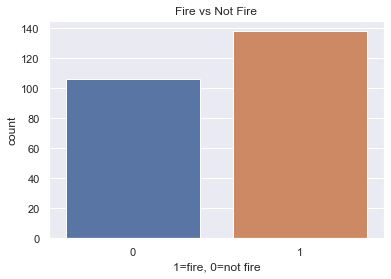

In [217]:
#### Plotting the fire and not fire cases
sns.countplot(data=algerian2,x='Classes')
plt.xlabel('1=fire, 0=not fire')
plt.title('Fire vs Not Fire')
plt.show()

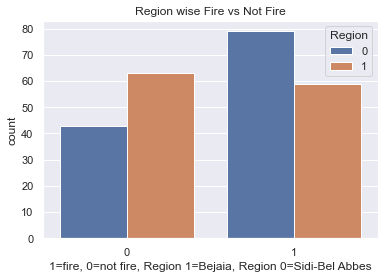

In [218]:
sns.countplot(data=algerian2,x='Classes',hue='Region')
plt.xlabel('1=fire, 0=not fire, Region 1=Bejaia, Region 0=Sidi-Bel Abbes')
plt.title('Region wise Fire vs Not Fire')
plt.show()

#### Observation
- Occurance of fire outnumbers not fires
- Region wise Sidi-Bel Abbes has more cases of fire than Bejaia

#### Let's find out the data distribution for all the features

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


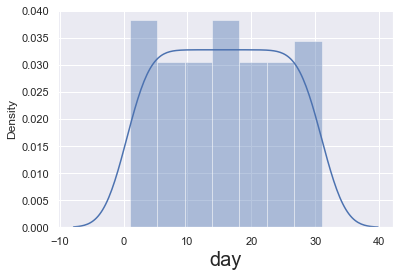

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


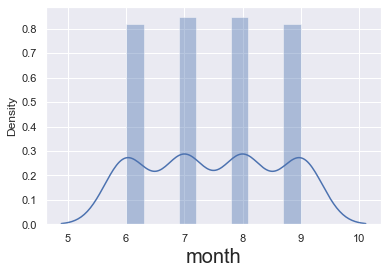

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


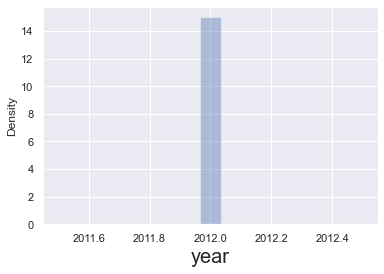

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


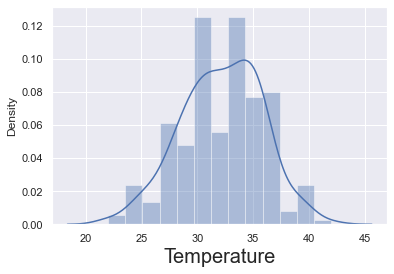

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


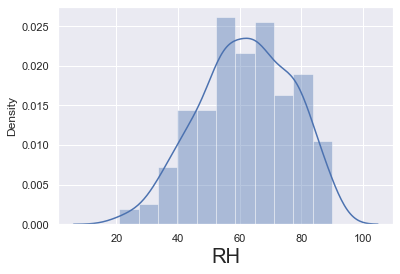

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


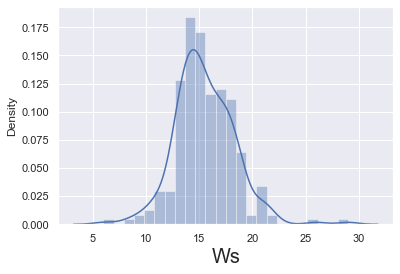

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


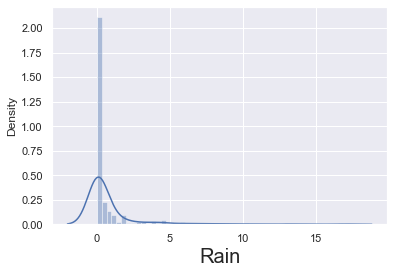

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


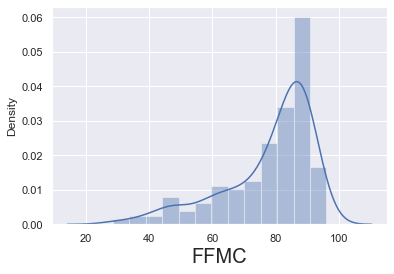

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


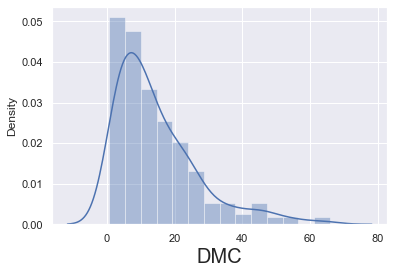

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


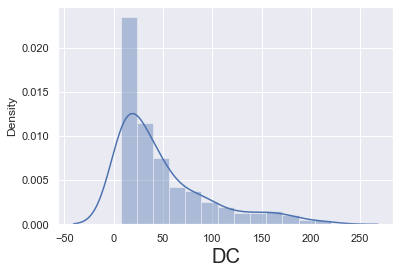

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


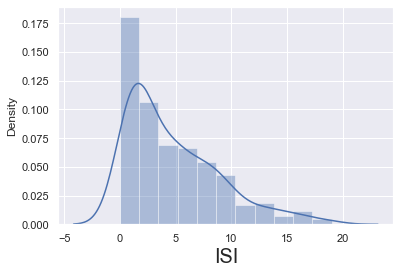

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


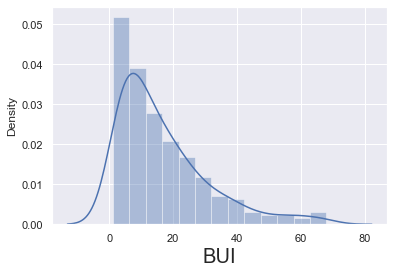

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


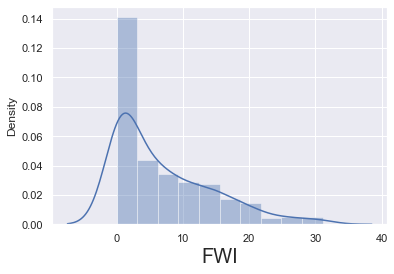

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


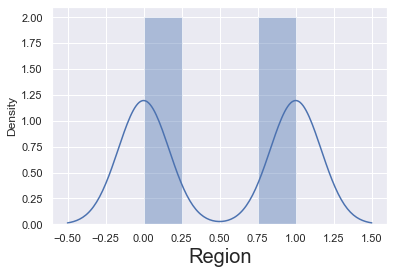

C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


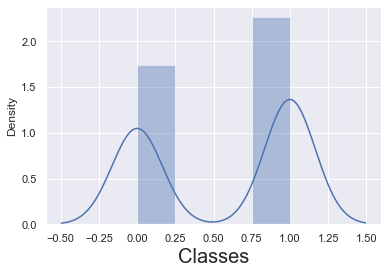

In [219]:
for features in algerian2:
    plt.subplot(5,3,plotnumber)
    sns.distplot(algerian2[features])
    plt.xlabel(features,fontsize=20)

#### Observation
- Temperature, RH, Ws are normally distributed
- DMC, DC, ISI, BUI, FWI are right skewed
- FFMC is left skewed
- Most of the features have outliers

#### Correlation

In [220]:
data_corr= round(algerian2[[feature for feature in algerian2 if feature not in ['day', 'month','year', 'Region','Classes']]].corr(),2)
data_corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00


<AxesSubplot:>

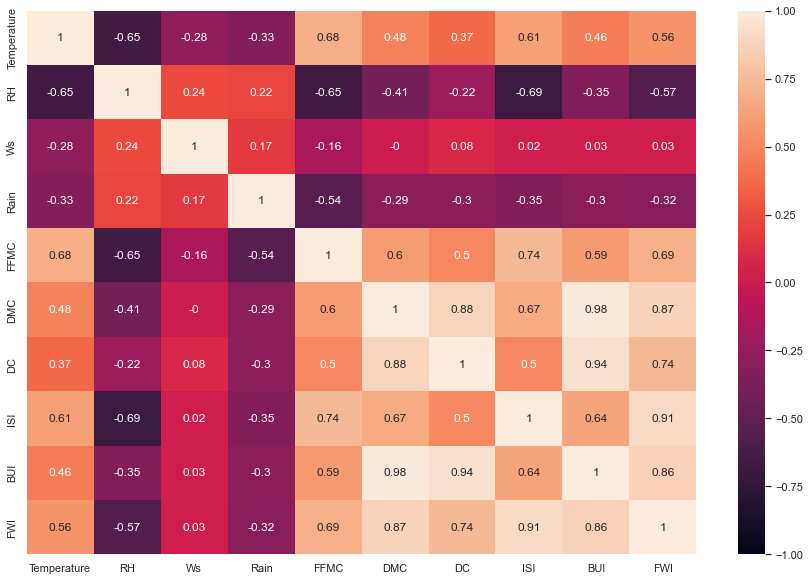

In [221]:
# Lets visualise the co-rrelation using heatmaps
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data_corr, annot=True, vmin=-1, vmax=1)

#### Observation
    1.highly co-related DMC-BUI, DMC-DC, ISI-FWI, BUI-FWI
    2.moderately co-related FWI-DC, ISI-DC, ISI-BUI
    3.negatively co-related Rain-Temperature, FFMC-RH, ISI-RH, FWI-RH, ISI-Rain

#### Outliers

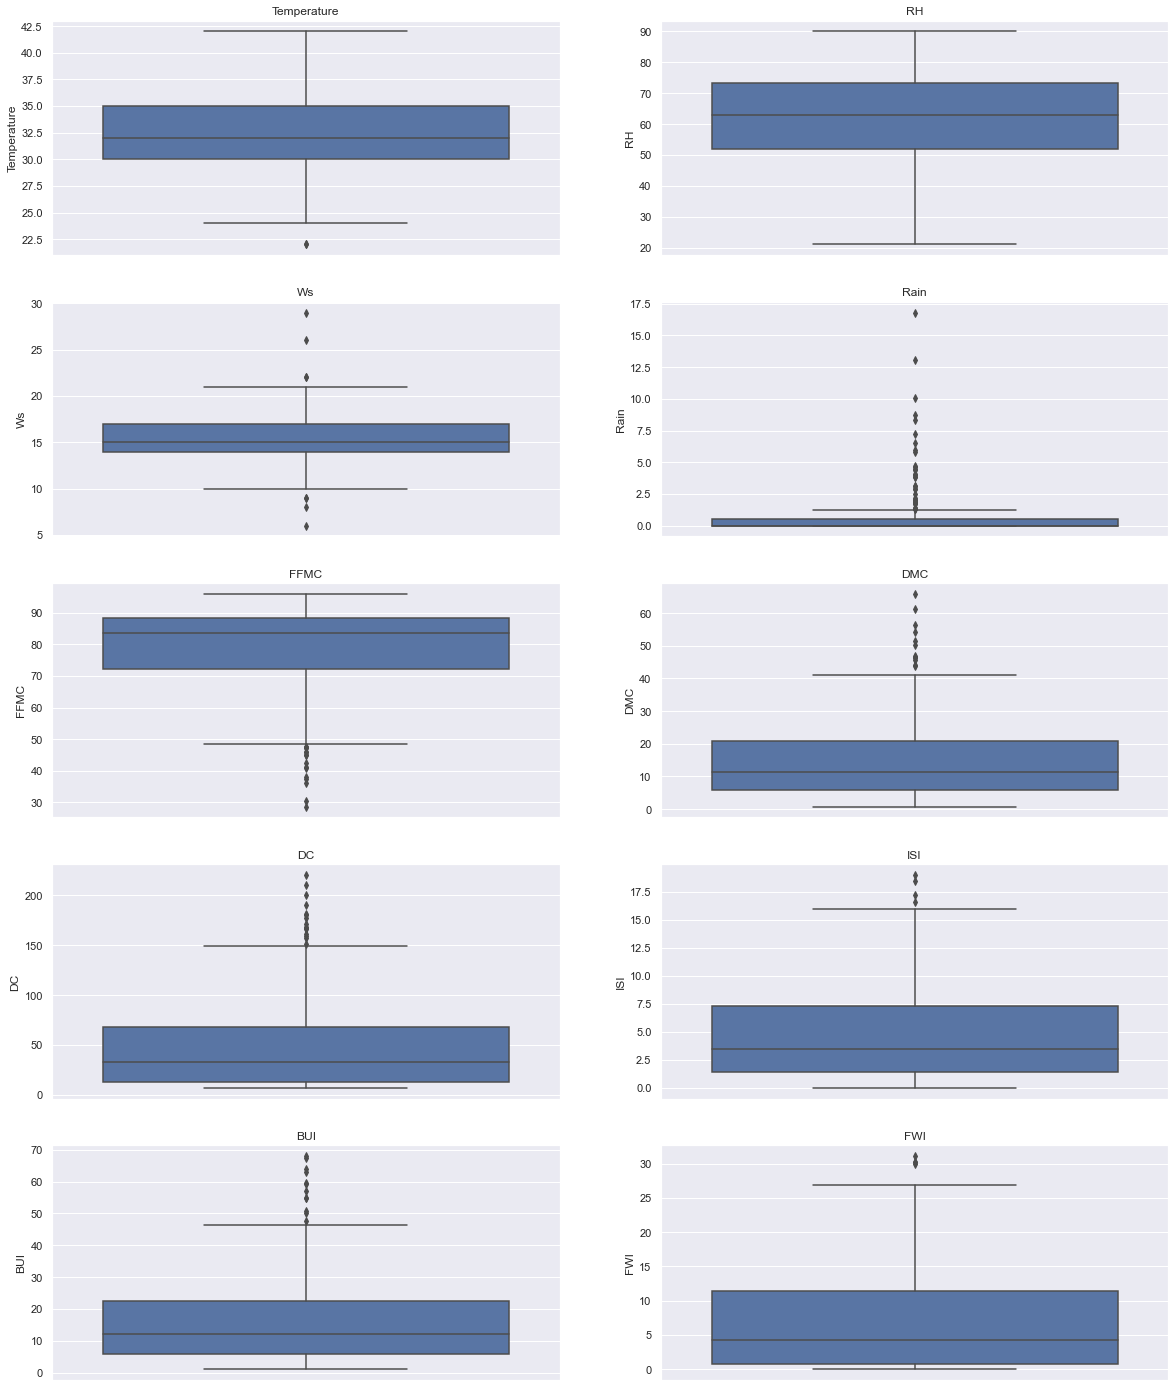

In [241]:
### Let's find out the outliers using boxplot
plotnumber=1
plt.figure(figsize=(20,25))
for features in algerian2:
    if features not in ['day', 'month','year','Region','Classes']:
        plt.subplot(5,2,plotnumber)
        sns.boxplot(data=algerian2,y=features)
        plt.title(features) 
        plotnumber+=1

#### Observation
- Except Temperature and RH most of the features have lots of outliers

In [223]:
algerian2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,2012,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
241,28,9,2012,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
242,29,9,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


#### Handling outliers using IQR method

In [297]:
#defining a function to handle outliers using IQR method
#algerian_copy=algerian2.copy()
algerian2=algerian_copy.copy()
index_to_drop=set()
def outlier_handling(feature):
    min_val=min(algerian2[feature])
    q1=algerian2[feature].quantile(q=0.25)
    q3=algerian2[feature].quantile(q=0.75)
    max_val=max(algerian2[feature])
    IQR=q3-q1
    lower_limit=q1-IQR*1.5
    upper_limit=q3+IQR*1.5
    indx=algerian2[(algerian2[feature]<lower_limit)|(algerian2[feature]>upper_limit)].index
    for ind in indx:
        index_to_drop.add(ind)
    return 'outlier index derived'

In [298]:
#passing all the features into the outlier_handling function
#algerian2=algerian_copy.copy()
for features in algerian2:
    if features not in ['day','month','year','Region','Classes']:
        outlier_handling(features)

In [299]:
len(index_to_drop)

68

In [ ]:
#dropping the indices with outliers
index_to_drop=list(index_to_drop)
algerian2.drop(index_to_drop,inplace=True)

In [304]:
algerian2.drop(['level_0','index'],axis=1,inplace=True)
algerian2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
2,6,6,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
3,7,6,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
4,8,6,2012,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,23,9,2012,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,0,1
172,25,9,2012,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,0
173,26,9,2012,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
174,29,9,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\subho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

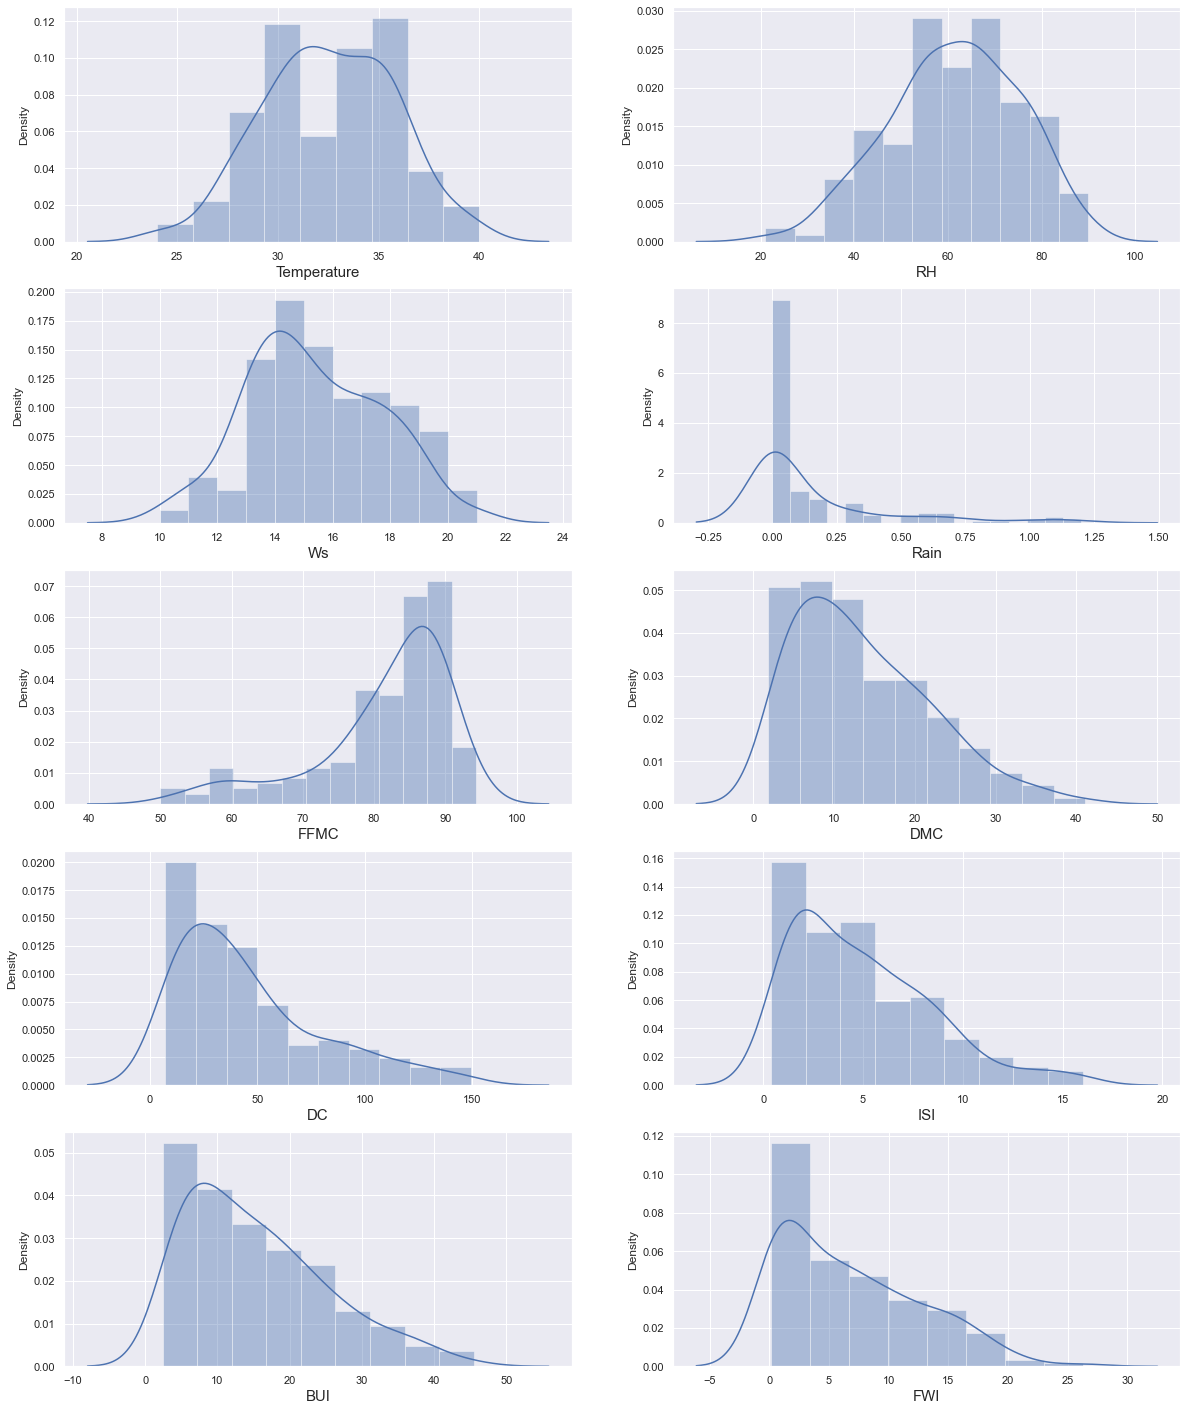

In [308]:
### Let's check the distribution of the features after removal of outliers
plotnumber=1
plt.figure(figsize=(20,25))
for features in algerian2:
    if features not in ['day','month','year','Region','Classes']:
        plt.subplot(5,2,plotnumber)
        sns.distplot(algerian2[features],kde=True)
        plt.xlabel(features,fontsize=15)
        plotnumber+=1

#### Observation
- The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [310]:
X = algerian2.drop(columns = ['Classes'])
y = algerian2['Classes']

In [ ]:
#we will also remove the year column as it's only for 2012

In [317]:
X.drop(columns=['year'],inplace=True)
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,5,6,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
2,6,6,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
3,7,6,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
4,8,6,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,23,9,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,0
172,25,9,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0
173,26,9,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
174,29,9,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


#### Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

C:\Users\subho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\subho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\subho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\subho\anacond

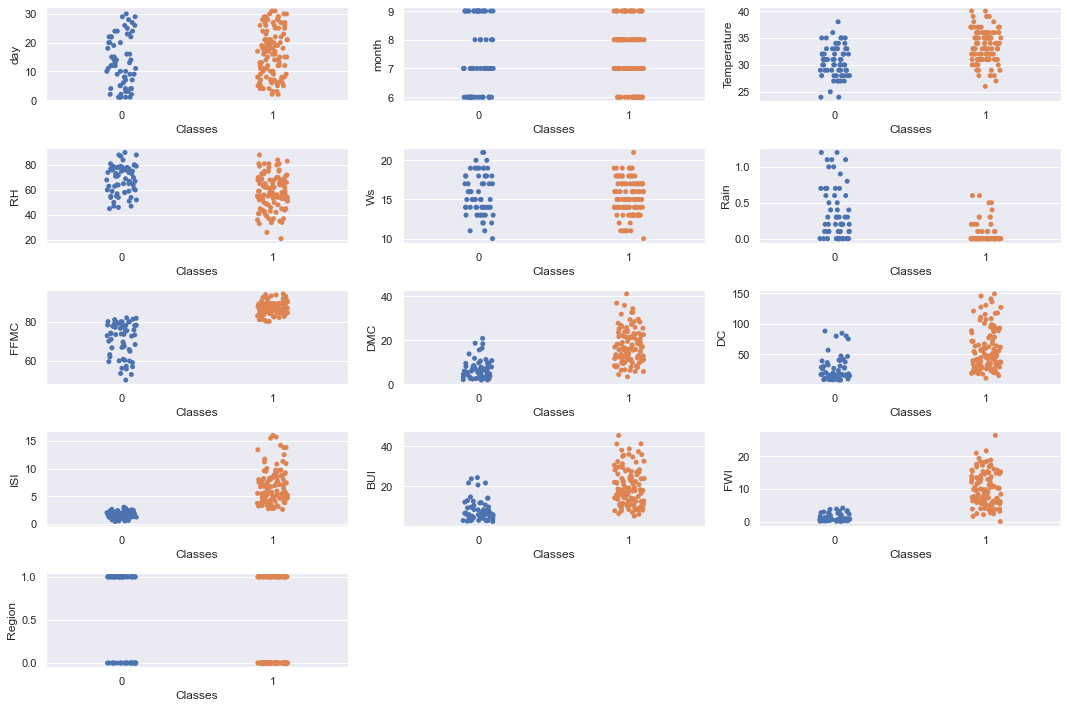

In [324]:
plotnumber=1
#plt.figure(figsize=(25,20))
for features in X:
    plt.subplot(5,3,plotnumber)
    sns.stripplot(y,X[features])
    plotnumber+=1
plt.tight_layout()

#### Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [325]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [327]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.70914493, -1.29366501, -1.0966354 , ..., -1.23930838,
        -1.07343309,  0.94470795],
       [-1.23393243, -1.29366501, -1.71525025, ..., -1.18779493,
        -1.07343309,  0.94470795],
       [-1.11512931, -1.29366501, -0.47802056, ..., -0.8684115 ,
        -0.72955936,  0.94470795],
       ...,
       [ 1.26093314,  1.40615762, -0.78732798, ...,  0.15155493,
        -0.04181192, -1.05852819],
       [ 1.61734251,  1.40615762, -2.64317251, ..., -1.06416263,
        -1.03904571, -1.05852819],
       [ 1.73614564,  1.40615762, -2.64317251, ..., -1.09507071,
        -1.07343309, -1.05852819]])

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [331]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.569066,day
1,1.189666,month
2,2.510949,Temperature
3,3.209429,RH
4,1.437911,Ws
5,2.883664,Rain
6,5.989993,FFMC
7,217.066299,DMC
8,71.577782,DC
9,17.227175,ISI


#### Some of the features are highly multicollinear. From the correlation among the features we noticed high correlation between BUI-DMC, BUI-DC, FWI-ISI all >90%. We can remove BUI, FWI features to reduce multicollinearity

In [332]:
X.drop(columns=['BUI','FWI'],inplace=True)

In [333]:
X_scaled=scaler.fit_transform(X)

In [334]:
## Lets check the collinearity again
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.567459,day
1,1.161694,month
2,2.475875,Temperature
3,3.197136,RH
4,1.418781,Ws
5,2.836311,Rain
6,5.653535,FFMC
7,7.374485,DMC
8,5.228981,DC
9,4.710844,ISI


### Observation
- Collinearity has improved significantly

### Model fitting

In [337]:
#spliting data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 50)

In [338]:
from sklearn.linear_model import LogisticRegression

In [339]:
logistic_reg=LogisticRegression()

In [340]:
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [344]:
# importing pickle library to dump the model
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(logistic_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

### Performance of the model

#### Accuracy

In [345]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [347]:
y_pred=logistic_reg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9090909090909091

#### Our model has >90% Accuracy!

#### Confusion_matrix

In [348]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[14,  2],
       [ 2, 26]], dtype=int64)

In [349]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [350]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9090909090909091

#### Recall

In [351]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.875

#### Precision

In [352]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.875

#### F1 Score

In [359]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.875

### Handling imbalanced data

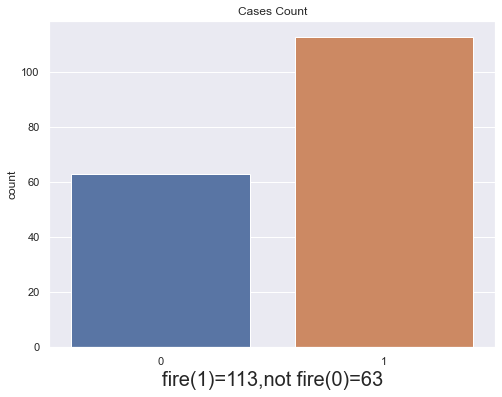

In [375]:
# visualisation of the imbalance
fire=len(algerian2[algerian2['Classes']==1])
not_fire=len(algerian2[algerian2['Classes']==0])
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(data=algerian2, x='Classes')
plt.xlabel('fire(1)={},not fire(0)={}'.format(fire,not_fire),fontsize=20)
plt.title('Cases Count')
plt.show()

#### Observation
- From the above graph we can see that the outcome is quite imbalanced. We need to deal with this imbalance to make the outcome more accurate.
- We'll use the Over Sampling method to handle the imbalance

In [380]:
#importing the library
!pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from imblearn.over_sampling import RandomOverSampler
over_sampler=RandomOverSampler(sampling_strategy=1)

In [4]:
algerian2=pd.read_csv('algerian2_imbalanced_cleaned.csv')
algerian2a=algerian2.copy()

In [9]:
X_imb=algerian2.drop('Classes',axis=1)
Y_imb=algerian2['Classes']

In [10]:
X_imb

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
2,6,6,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
3,7,6,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
4,8,6,2012,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,23,9,2012,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,0
172,25,9,2012,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0
173,26,9,2012,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
174,29,9,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [11]:
Y_imb

0      0
1      0
2      1
3      1
4      1
      ..
171    1
172    0
173    1
174    0
175    0
Name: Classes, Length: 176, dtype: int64

In [15]:
#passing the imbalanced data into the RandomOverSampler instance
X_baln,Y_baln=over_sampler.fit_resample(X_imb,Y_imb)

In [17]:
# checking the sample sizes after oversampling. Both should have same size.
X_baln.shape, Y_baln.shape

((226, 14), (226,))

In [19]:
#Comparing the imbalanced and balanced target column before and after over sampling
print('Length of data X data before and after sampling:',len(X_imb),len(X_baln))
print('Length of data Y data before and after after sampling:',len(Y_imb),len(Y_baln))

Length of data X data before and after sampling: 176 226
Length of data Y data before and after after sampling: 176 226


#### Building the model using the balanced dataset

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [22]:
#### Scaling the dataset using StandardScaler
scaler=StandardScaler()
X_baln_scaled=scaler.fit_transform(X_baln)
X_baln_scaled

array([[-1.62947311, -1.26339577,  0.        , ..., -1.07553056,
        -0.88568746,  0.88290858],
       [-1.16243326, -1.26339577,  0.        , ..., -1.02303393,
        -0.88568746,  0.88290858],
       [-1.04567329, -1.26339577,  0.        , ..., -0.69755481,
        -0.53194466,  0.88290858],
       ...,
       [-0.92891333,  1.34019795,  0.        , ..., -0.89704201,
        -0.86800032,  0.88290858],
       [-0.69539341,  1.34019795,  0.        , ..., -1.15952517,
        -0.93874888,  0.88290858],
       [-1.51271315, -0.3955312 ,  0.        , ..., -1.13852652,
        -0.92106174,  0.88290858]])

In [24]:
# Checking collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_baln_scaled,i) for i in range(X_baln_scaled.shape[1])]
vif["Features"] = X_baln.columns
vif

C:\Users\subho\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.579953,day
1,1.184836,month
2,NaN,year
3,2.589755,Temperature
4,3.130113,RH
5,1.437573,Ws
6,3.125004,Rain
7,6.465067,FFMC
8,245.058210,DMC
9,76.864430,DC


#### Some of the features are highly multicollinear. From the correlation among the features we noticed high correlation between BUI-DMC, BUI-DC, FWI-ISI all >90%. We can remove BUI, FWI features to reduce multicollinearity

In [25]:
X_baln.drop(columns=['BUI','FWI','year'],inplace=True)

In [26]:
X_baln_scaled=scaler.fit_transform(X_baln)
X_baln_scaled

array([[-1.62947311, -1.26339577, -0.96687659, ..., -1.01380677,
        -0.85238765,  0.88290858],
       [-1.16243326, -1.26339577, -1.59388981, ..., -0.81143588,
        -0.88176688,  0.88290858],
       [-1.04567329, -1.26339577, -0.33986336, ..., -0.56613784,
        -0.32356152,  0.88290858],
       ...,
       [-0.92891333,  1.34019795, -0.33986336, ..., -0.32390602,
        -0.79362919,  0.88290858],
       [-0.69539341,  1.34019795, -0.65336998, ..., -0.98927696,
        -1.02866303,  0.88290858],
       [-1.51271315, -0.3955312 , -1.59388981, ..., -0.99234319,
        -0.9992838 ,  0.88290858]])

In [27]:
### Let's check the collinearity again. This should improve this time
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_baln_scaled,i) for i in range(X_baln_scaled.shape[1])]
vif["Features"] = X_baln.columns
vif

,vif,Features
0,1.576015,day
1,1.129410,month
2,2.528158,Temperature
3,3.115176,RH
4,1.396230,Ws
5,3.024769,Rain
6,5.956636,FFMC
7,8.273551,DMC
8,5.427348,DC
9,4.483633,ISI


In [30]:
x_baln_train,x_baln_test,y_baln_train,y_baln_test = train_test_split(X_baln_scaled,Y_baln, test_size= 0.25, random_state = 51)

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_reg=LogisticRegression()

In [34]:
logistic_reg.fit(x_baln_train,y_baln_train)

LogisticRegression()

In [36]:
y_pred=logistic_reg.predict(x_baln_test)

#### Accuracy

In [37]:
accuracy=accuracy_score(y_baln_test,y_pred)
accuracy

0.9473684210526315

#### Confusion Matrix

In [39]:
CNF=confusion_matrix(y_baln_test,y_pred)
CNF

array([[25,  1],
       [ 2, 29]], dtype=int64)

In [41]:
true_positive = CNF[0][0]
false_positive = CNF[0][1]
false_negative = CNF[1][0]
true_negative = CNF[1][1]

#### Precision

In [42]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9615384615384616

#### Recall

In [43]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9259259259259259

#### F1 Score

In [44]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9433962264150944

### Comparison of scores Balanced vs Imbalanced Data

#### Accuracy

In [48]:
print('Accuracy with imbalanced data is {}%'.format(round(0.9090909090909091*100),3))
print('Accuracy with balanced data is {}%'.format(round(0.9473684210526315*100),3))

Accuracy with imbalanced data is 91%
Accuracy with balanced data is 95%


#### Precision

In [50]:
print('Precision with imbalanced data is {}%'.format(round(0.875*100),3))
print('Precision with balanced data is {}%'.format(round(0.9615384615384616*100),3))

Precision with imbalanced data is 88%
Precision with balanced data is 96%


In [51]:
print('F1_Score with imbalanced data is {}%'.format(round(0.875*100),3))
print('F1_Score with balanced data is {}%'.format(round(0.9433962264150944*100),3))

F1_Score with imbalanced data is 88%
F1_Score with balanced data is 94%
